# [과제] 전복 성별 예측 XGBoost 모델링

## 목표
- 전복 데이터셋을 사용하여 'Sex'를 target 변수로 하는 XGBoost 예측 모델을 만들고 분석합니다.
- 강사님과 함께 진행한 실습 파일을 참고하여 과제를 진행 해 주세요.
- 아래 코드는 강사님이 제공한 강의 자료이며, 과제 수행을 위해 코드를 수정해야 합니다.

## 1. 데이터 준비
- Target 변수를 'Sex'로 변경하고, 나머지 변수들을 특성으로 사용하세요.
- 'Sex' 변수를 숫자로 인코딩하세요.
- 데이터를 학습용(80%)과 테스트용(20%)으로 분할하세요.

## 2. XGBoost 모델 생성 및 학습
- XGBoost 분류기를 생성하고 학습시키세요.
- 모델의 성능을 평가하고 정확도를 출력하세요.

## 3. Feature Importance 분석
- 모델의 Feature Importance를 계산하고 시각화하세요.
- 'Sex' 예측에 가장 중요한 특성 3가지를 설명해보세요.

## 4. 결과 해석
- 모델의 성능과 중요 특성들을 바탕으로, 전복의 성별을 예측하는데 어떤 요인들이 중요한지 간단히 설명해보세요.

## 제출 안내
- 아래 셀 부터 각 단계마다 코드를 작성하고 분석 결과에 대한 설명은 주석으로 작성 해 주세요.
- 본 실습파일 프로젝트 폴더 전체를 .zip으로 압축하여 지니어스에 업로드 해주세요!


In [ ]:
# 로컬에서 코드 실행 시 다운로드 필요
# !pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org -U numpy
# !pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org -U pandas
# !pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org -U scikit-learn
# !pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org -U matplotlib
# !pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org -U seaborn
# !pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org -U shap
# !pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org -U xgboost
# !pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org -U ucimlrepo


# 1교시, 데이터업로드




In [ ]:
# 사외 PC에서는 아래 패키지를 설치해서 실습을 진행 해 주세요.
#!pip install ucimlrepodd
!pip3 install -U ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings; warnings.filterwarnings('ignore')

In [ ]:
# ////////////////////////////////////////////////////////////////////////
# 사외 PC에서는 아래 코드로 실습을 진행해 주세요.

#데이터 로드
from ucimlrepo import fetch_ucirepo
# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)
# variable information
print(abalone.variables)

df = X
df['target'] = y

# ////////////////////////////////////////////////////////////////////////
# 사내 PC에서는 아래 코드로 실습을 진행 해주세요.
# 다운받은 CSV 파일이
# avalone = pd.read_csv("./data/avalon.csv")

# df = avalone.iloc[:, 1:]
# df['target'] = avalone.iloc[:, 0]

df


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,target
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   target          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
# EDA (Exploratory Data Analysis) 탐색적 데이터 분석
print(df.shape)
print(df.describe())

(4177, 9)
            Length     Diameter       Height  Whole_weight  Shucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera_weight  Shell_weight       target  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130

In [ ]:
# 총 1 ~ 29까지의 값이 있음
print(df['target'].value_counts().sort_index())

target
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: count, dtype: int64


In [ ]:
# 수치형 컬럼만 선택
numeric_df = df.drop('Sex', axis=1)

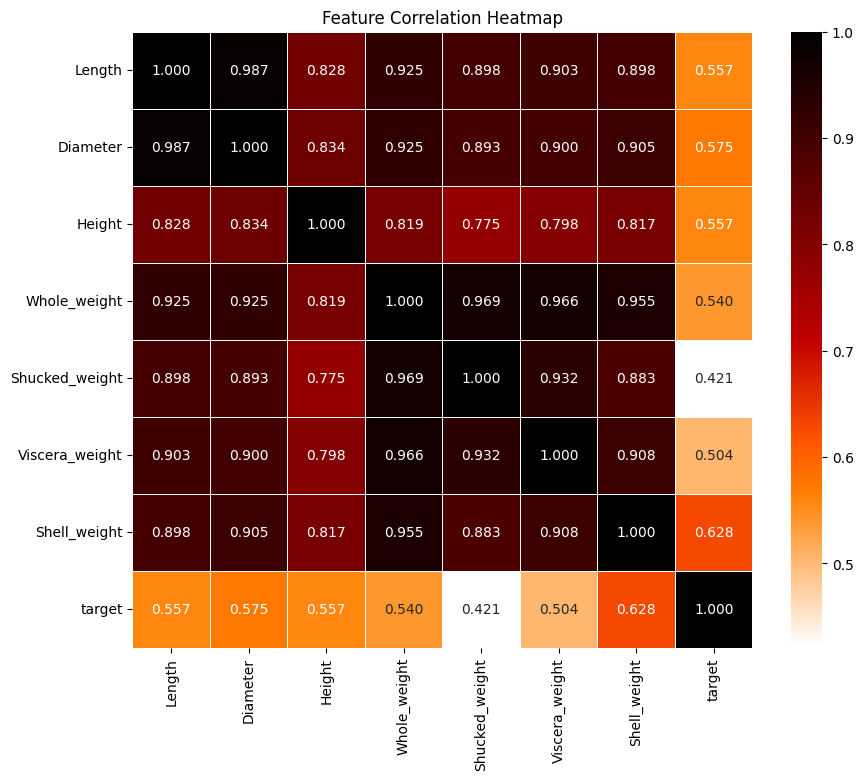

In [ ]:
# 특성 간 싱관관계 히트맵
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot = True, cmap = 'gist_heat_r', linewidths = 0.5, fmt='.3f')
plt.title("Feature Correlation Heatmap")
plt.show()

# 2교시. EDA

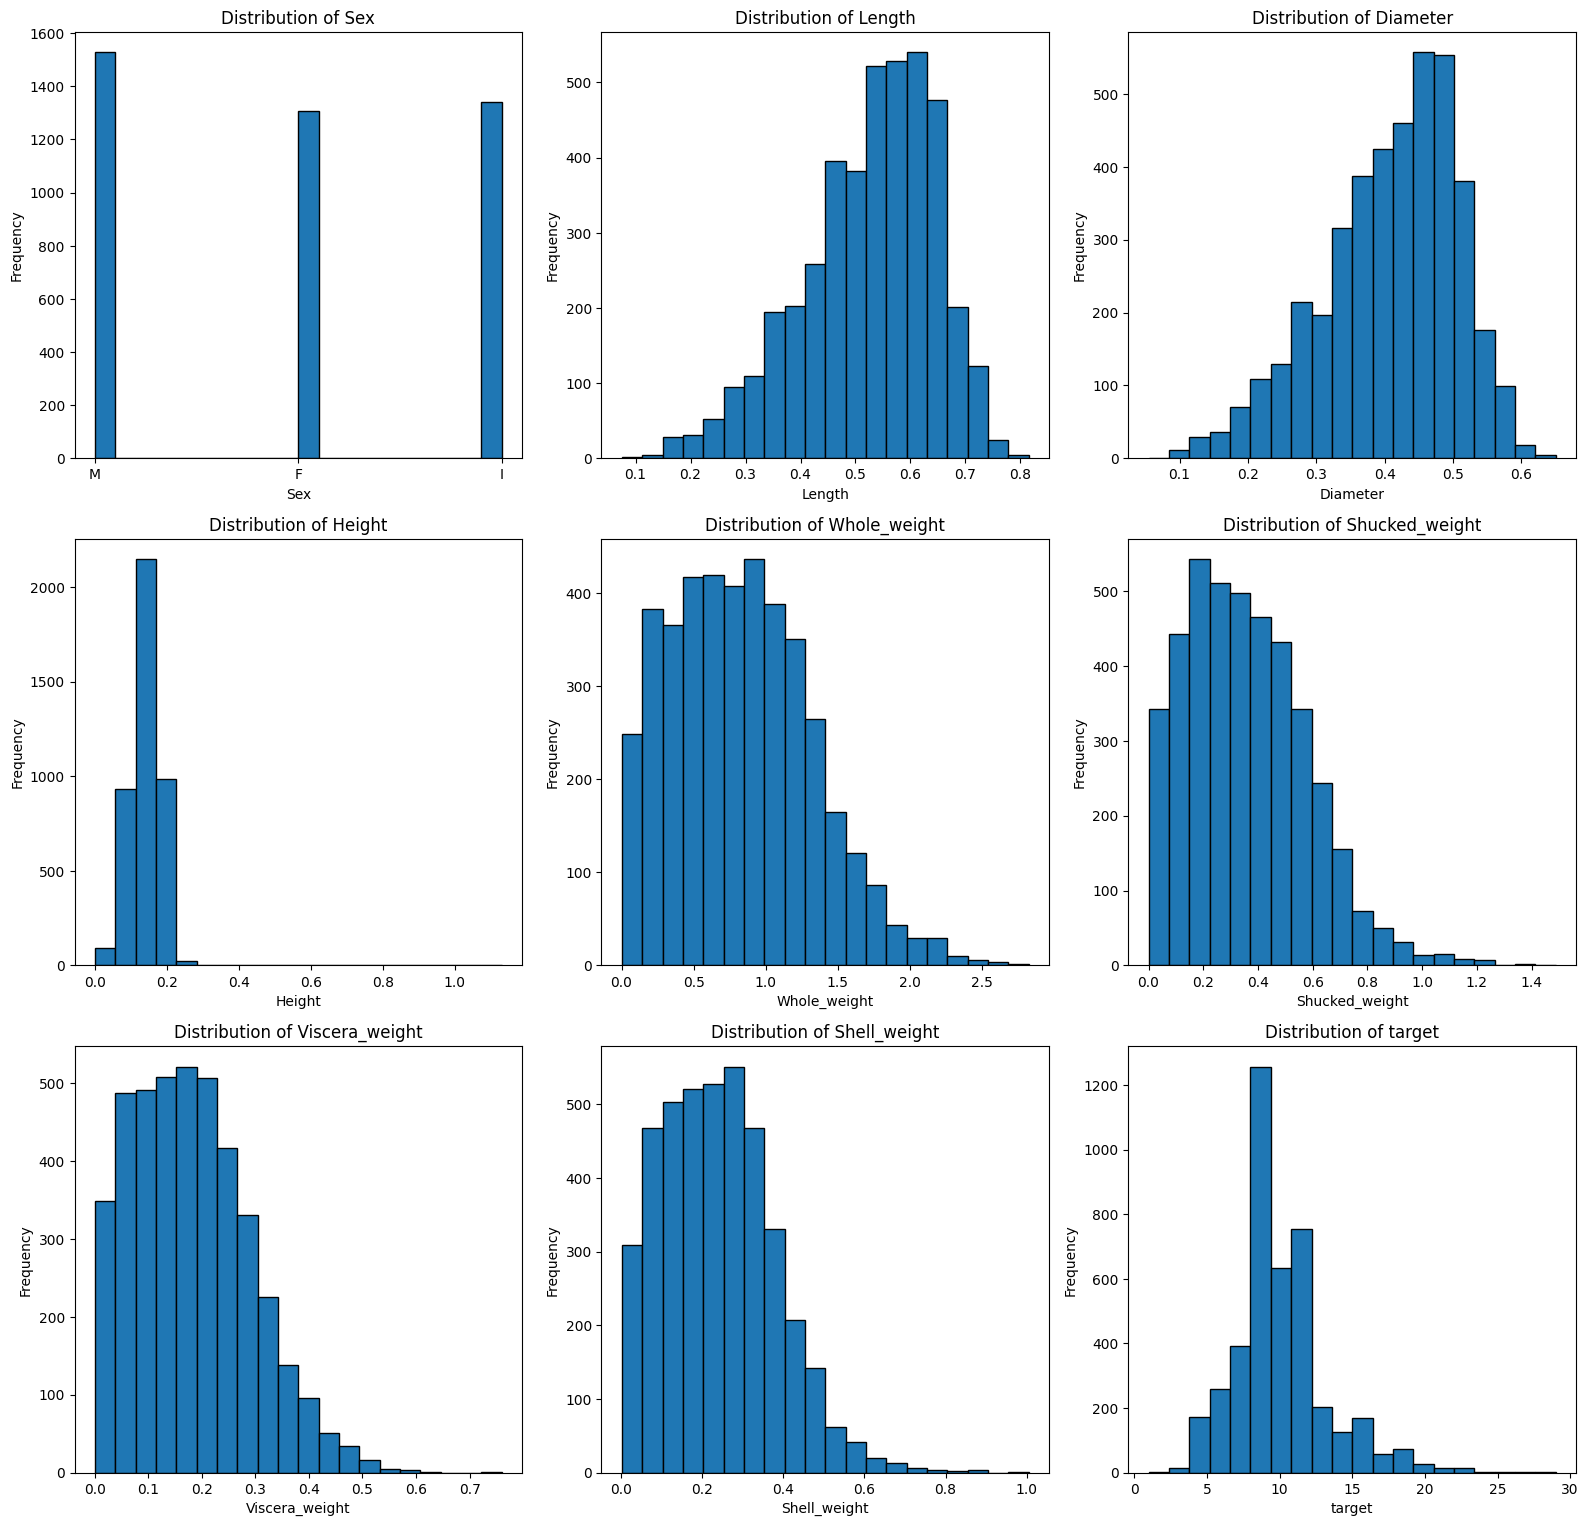

In [ ]:
# 특성별 분포 시각화
plt.figure(figsize=(16, 20))
for i, feature in enumerate(df.columns):
    plt.subplot(4, 3, i+1) # row, column, 순서
    plt.hist(df[feature], bins=20, edgecolor='black')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

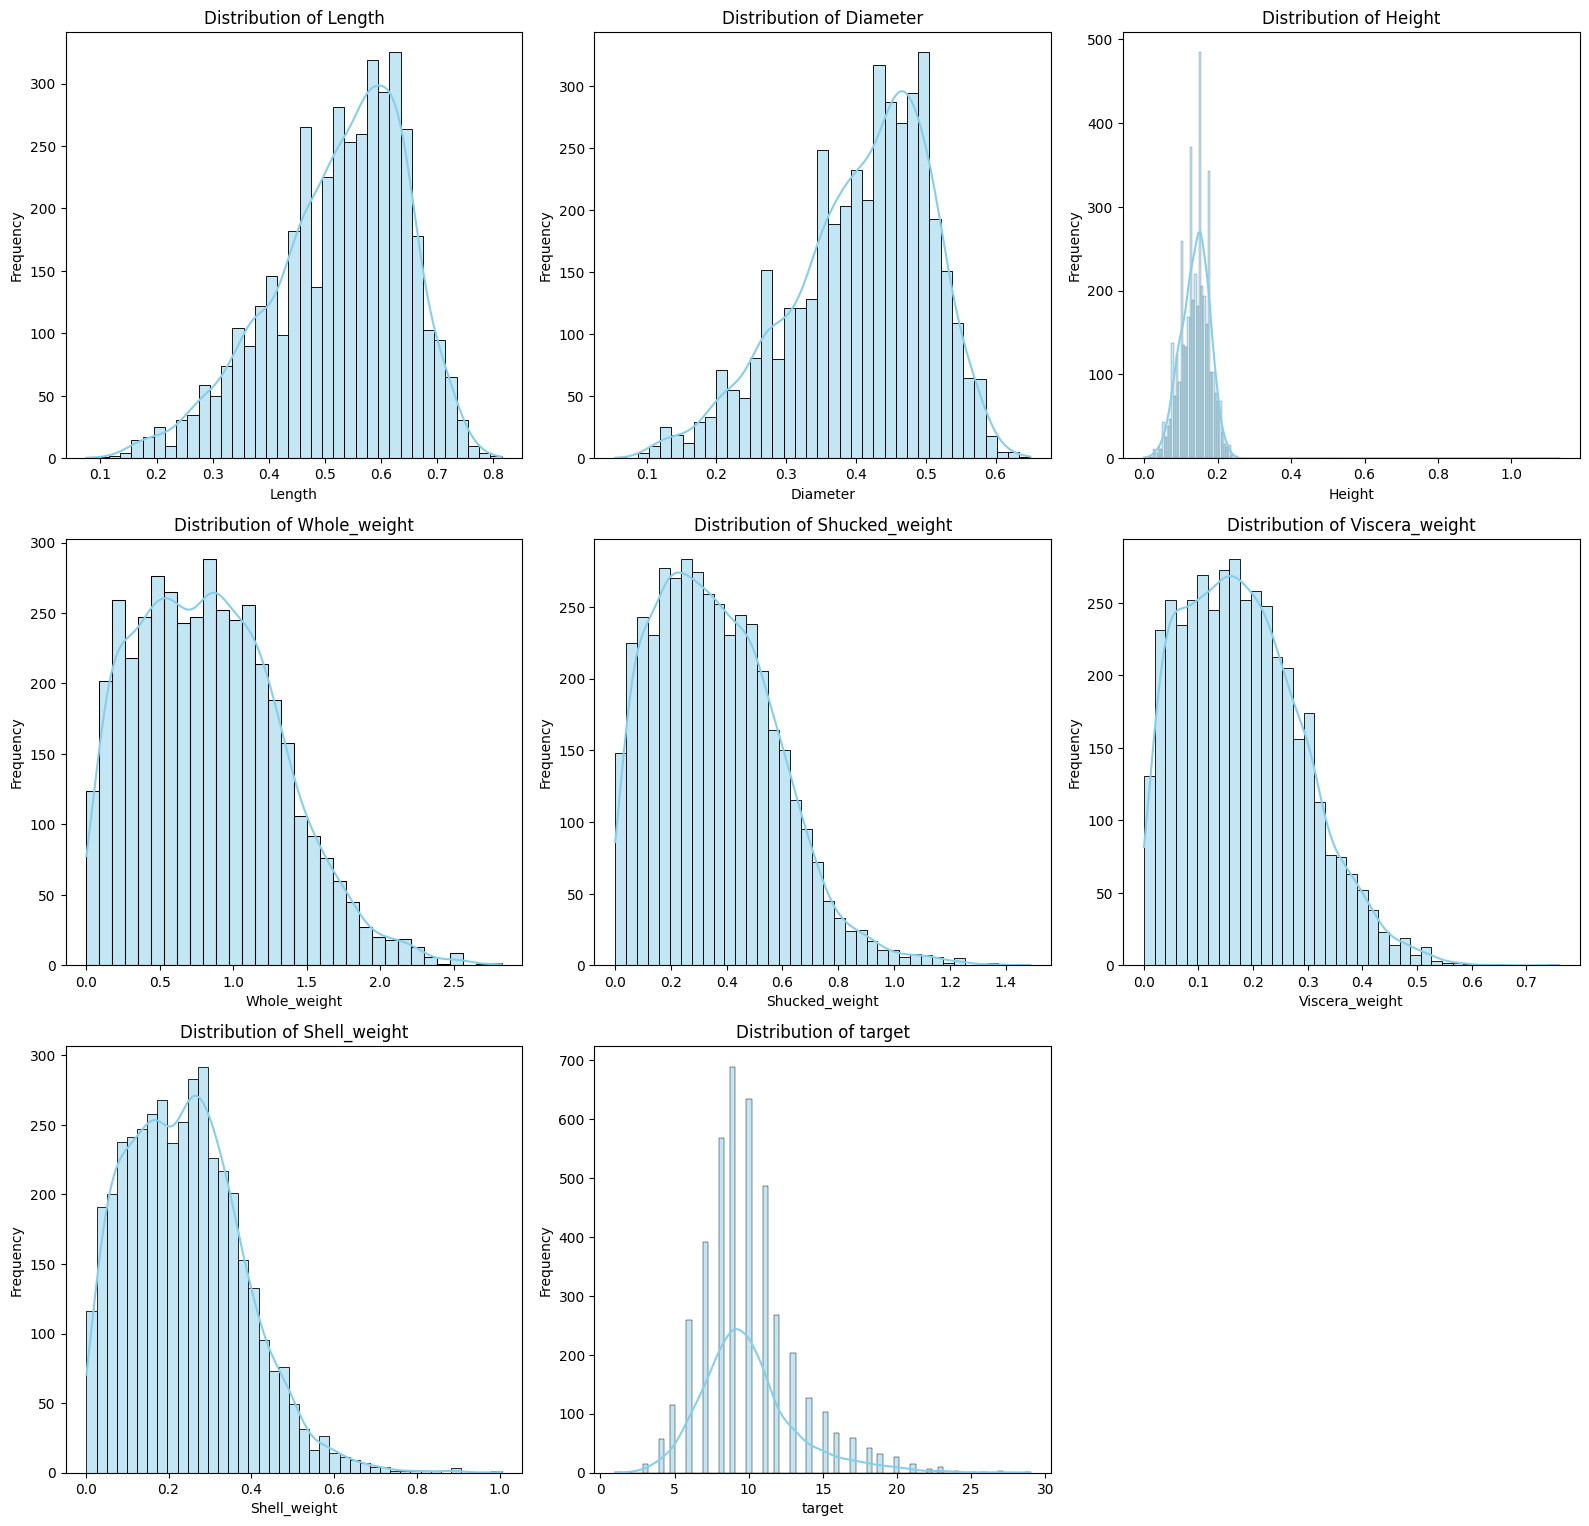

In [ ]:
# 특성별 분포 시각화
plt.figure(figsize=(16, 20))
for i, feature in enumerate(numeric_df.columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(numeric_df[feature], kde=True, color="skyblue", edgecolor="black")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

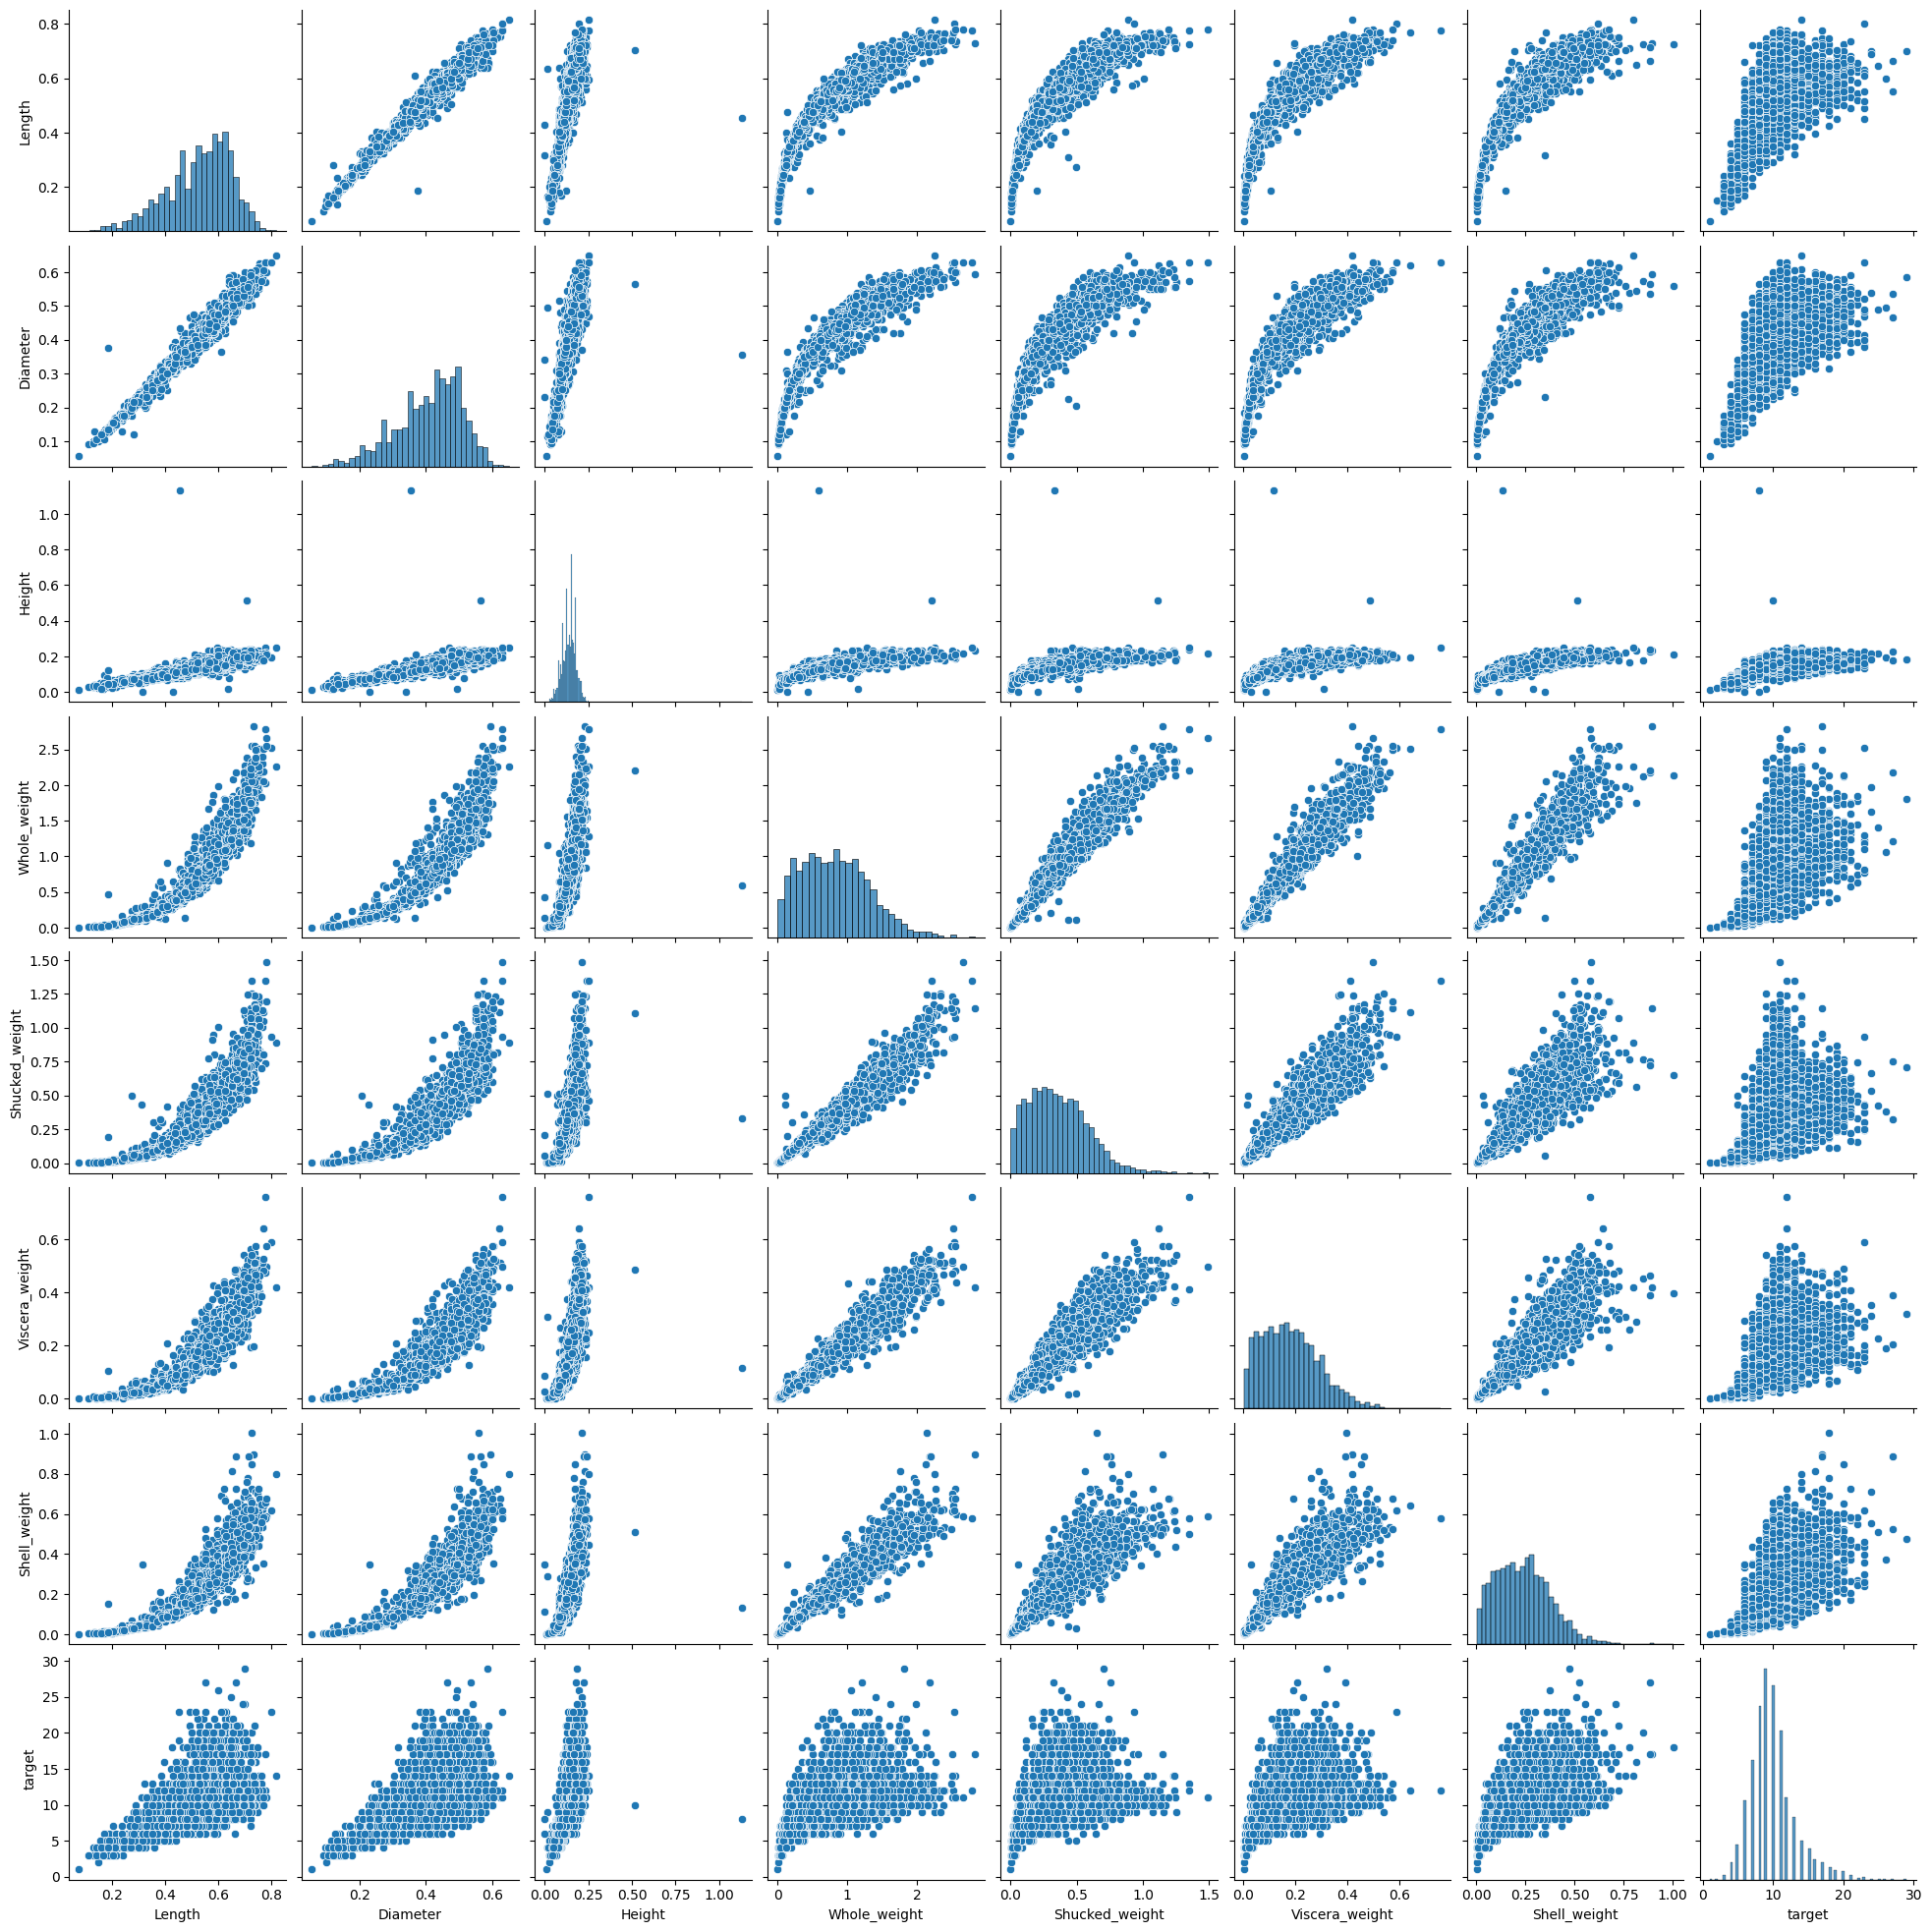

In [ ]:
# 두변수의 관계 8개 8x8
sns.pairplot(numeric_df)

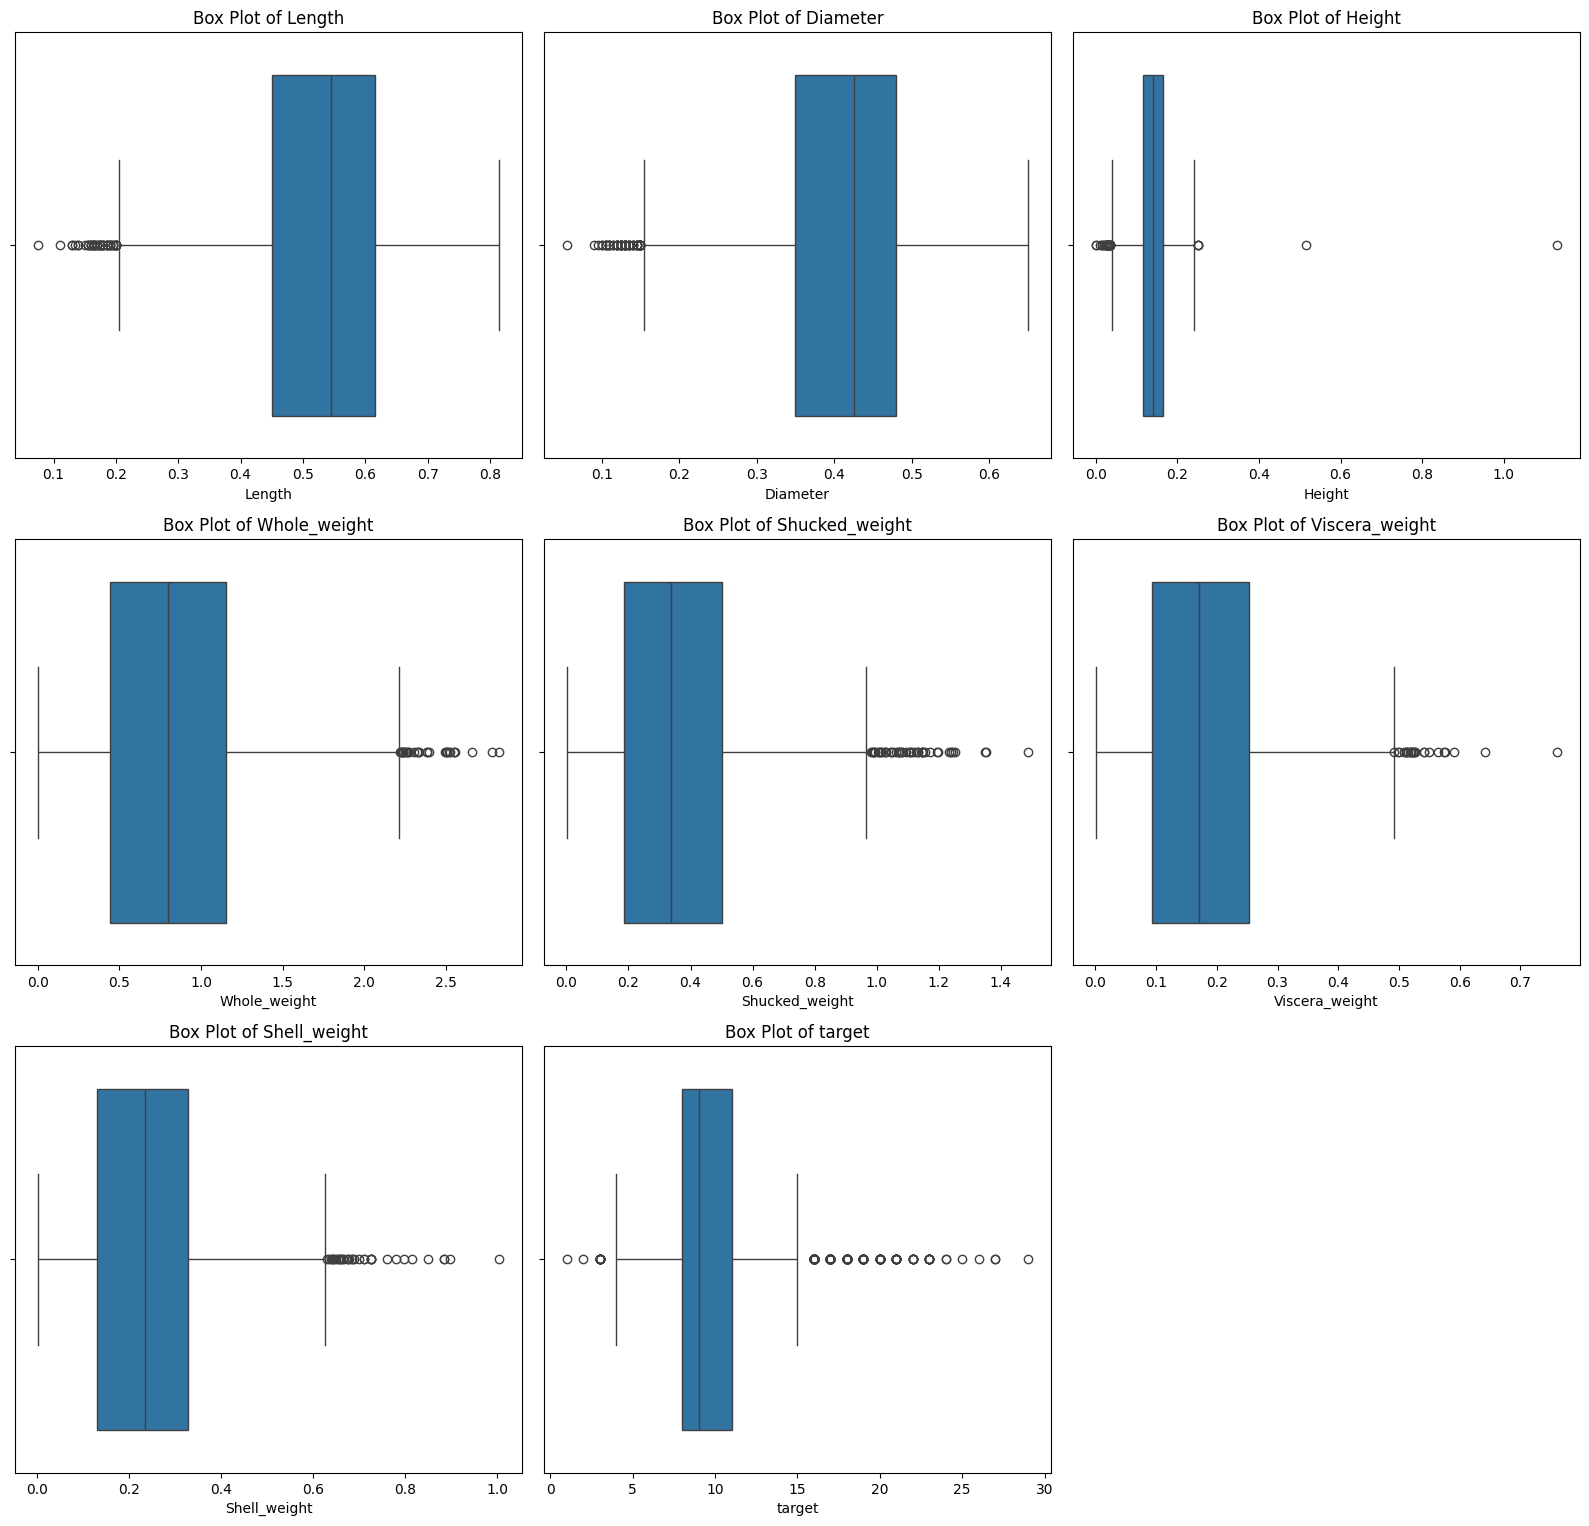

In [ ]:
plt.figure(figsize=(16, 20))
for i, feature in enumerate(numeric_df.columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=numeric_df[feature])
    plt.title(f"Box Plot of {feature}")
plt.tight_layout()
plt.show()

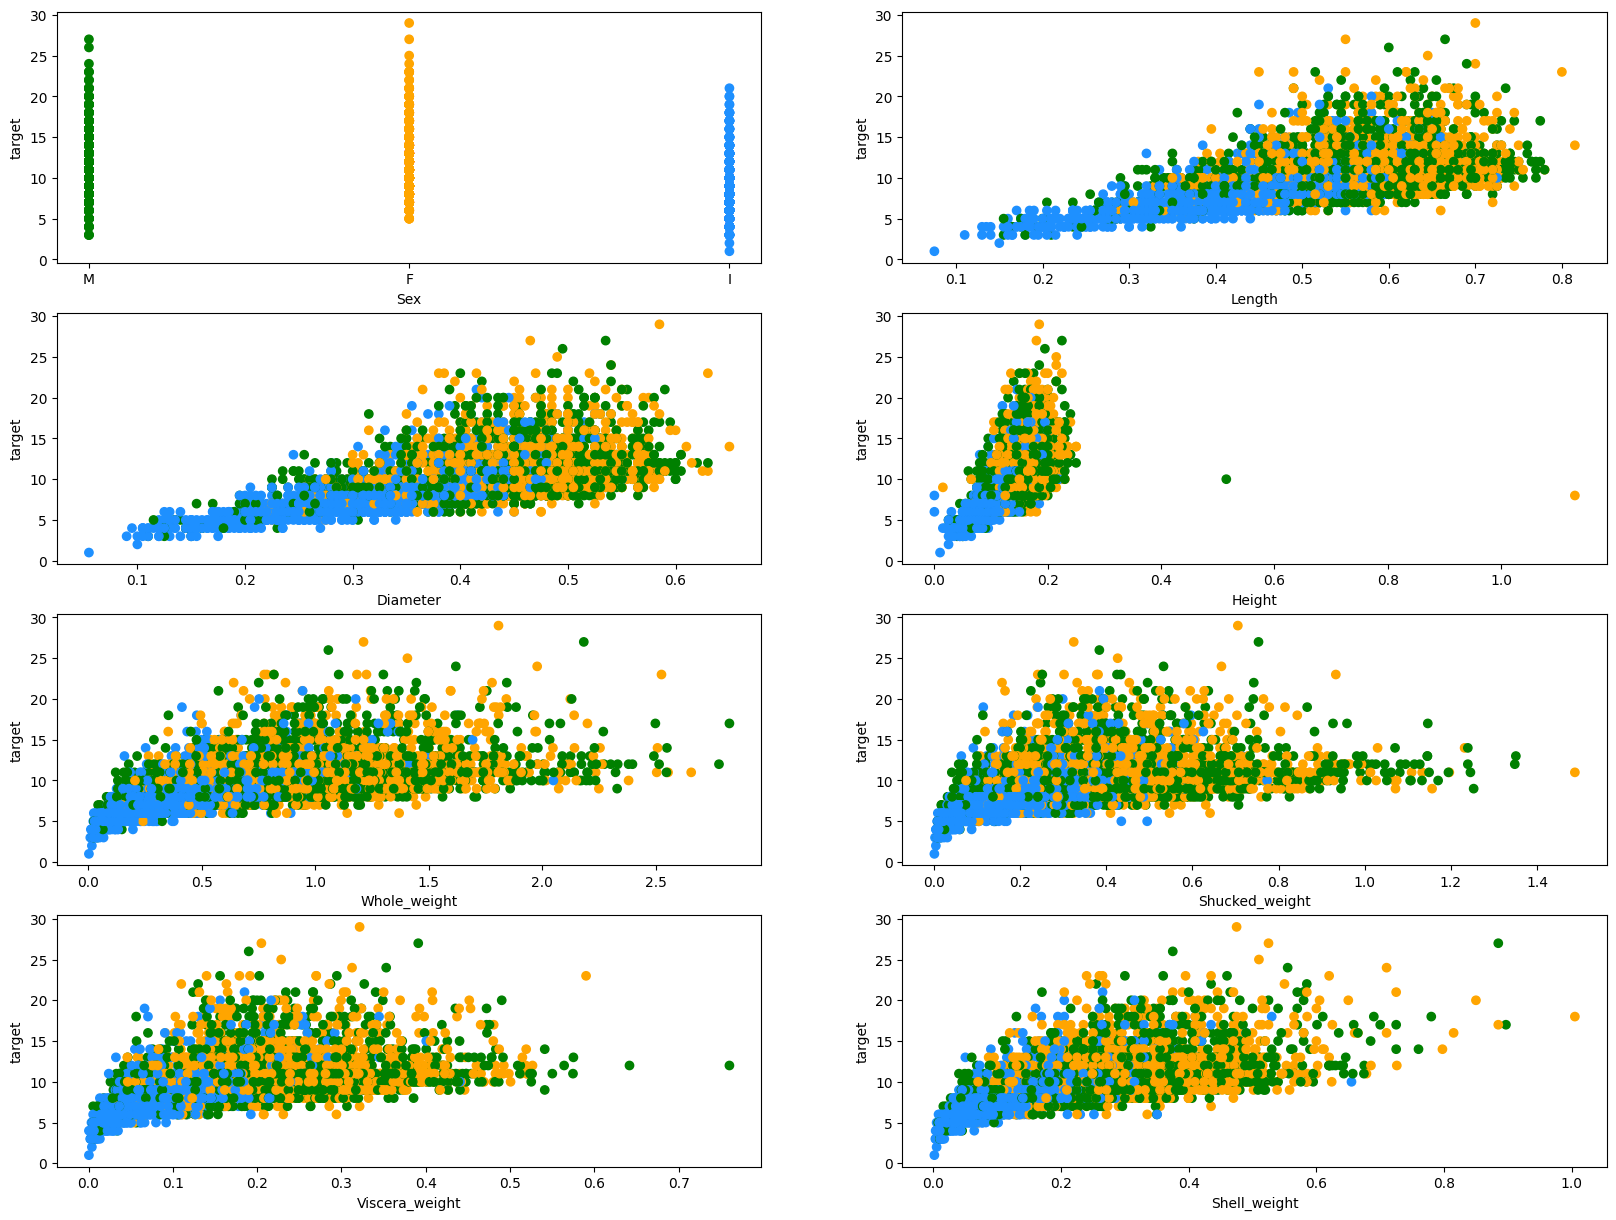

In [ ]:
# plot scatter plots
def plot_scatter_plots():
    i, j = 0, 0
    fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
    # map colors by sex classes
    colors = {'F': 'orange', 'I': 'dodgerblue', 'M': 'green'}

    # without last column ('age')
    for column in df.iloc[:, 0:-1]:
        ax[i][j].scatter(x=df[column], y=df['target'], c=df['Sex'].map(colors))
        ax[i][j].set_xlabel(column)
        ax[i][j].set_ylabel('target')
        j += 1
        if j % 2 == 0:
            i += 1
            j = 0
    plt.show() # 한줄에 2칸씩 그리게 하기, 짝수면 한칸 이동, 홀수면 그대로 민 것

plot_scatter_plots()

#3교시. Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# age를 young, old, medium으로 수정
for ix in df.index:
    row = df.loc[ix]
    if row.target <= 8:
        df.loc[ix, 'target'] = 'young'
    elif row.target >= 11:
        df.loc[ix, 'target'] = 'old'
    elif row.target >=9 & row.target <= 10:
        df.loc[ix, 'target'] = 'medium'

df.head(5)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,target
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,old
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,young
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,medium
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,medium
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,young


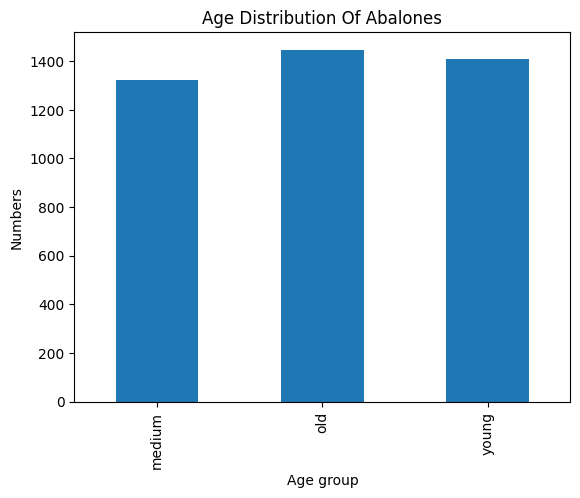

In [ ]:
age_group = df.groupby('target').target.count()
ax = age_group.plot(kind='bar')
plt.ylabel('Numbers')
plt.xlabel('Age group')
plt.title('Age Distribution Of Abalones')
plt.show()

In [ ]:
# 'Sex' 열의 문자열 값을 수치형으로 변환
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [ ]:
# 인코딩 결과 확인
encoding_dict = dict(zip(le.classes_, le.transform(le.classes_)))
print("Encoding results:")
for key, value in encoding_dict.items():
    print(f"{key}: {value}")

Encoding results:
F: 0
I: 1
M: 2


In [ ]:
# 특성 (Feature)와 타겟(target)의 데이터를 분리
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
# 학습데이터와 테스트 데이터로 분리 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [ ]:
# Decision Tree 모델 생성 및 학습
clf = DecisionTreeClassifier(criterion= 'entropy', max_depth = 3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
# 학습된 모델의 Hyper-parameter출력
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
#학습된 모델로 Test (분류수행)
y_pred = clf.predict(X_test)

In [ ]:
# 정확도 계산 및 분류 리포트를 출력
accuracy = accuracy_score(y_test, y_pred)
print("\n Accuracy:", accuracy)
print("\n Classification Report", classification_report(y_test, y_pred))


 Accuracy: 0.5753588516746412

 Classification Report               precision    recall  f1-score   support

      medium       0.56      0.19      0.28       281
         old       0.49      0.87      0.63       276
       young       0.75      0.67      0.71       279

    accuracy                           0.58       836
   macro avg       0.60      0.58      0.54       836
weighted avg       0.60      0.58      0.54       836



In [ ]:
# unique_classes = sorted(y.unique())

# # 문자열로 변환
# class_names = [str(c) for c in unique_classes]



```
# 코드로 형식 지정됨
```

#4교시. Xgboost

*이탤릭체 텍스트*# 새 섹션

In [ ]:
from sklearn.model_selection import train_test_split
# Xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance, plot_tree

In [ ]:
# # 데이터준비
# # 특성 (Feature)와 타겟(target)의 데이터를 분리
# X = df.drop('target', axis=1)
# y = df['target']

In [ ]:
# # age를 young, old, medium으로 수정
# for ix in df.index:
#     row = df.loc[ix]
#     if row.target <= 8:
#         df.loc[ix, 'target'] = 'young'
#     elif row.target >= 11:
#         df.loc[ix, 'target'] = 'old'
#     elif row.target >=9 & row.target <= 10:
#         df.loc[ix, 'target'] = 'medium'

# df.head(5)

In [ ]:
# 타겟 변수에 대해 레이블 인코딩 수행
# 계산을 빠르게 하기위해서 라벨을 0부터 시작하는 숫자로 변경 0,1,2해야함 (메모리 효율성)
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# 학습데이터와 테스트 데이터로 분리 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [ ]:
# y의 유니크한 값 출력
unique_values = np.unique(y)
print("Unique values in y after encoding:", unique_values)

# 원래 라벨과 인코딩된 값의 매핑 출력
for i, class_name in enumerate(le.classes_):
    print(f"Original: {class_name}, Encoded: {i}")

Unique values in y after encoding: [0 1 2]
Original: medium, Encoded: 0
Original: old, Encoded: 1
Original: young, Encoded: 2


In [ ]:
# XGBoost Model.1: Default 모델 생성 및 학습
xgb_model_basic = XGBClassifier(random_state=42)
xgb_model_basic.fit(X_train, y_train )

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# XGBoost Model.1: 평가
y_pred = xgb_model_basic.predict(X_test)
# 정확도 계산 및 분류 리포트를 출력
accuracy = accuracy_score(y_test, y_pred)
print("\n Accuracy:", accuracy)
print("\n Classification Report", classification_report(y_test, y_pred))


 Accuracy: 0.6411483253588517

 Classification Report               precision    recall  f1-score   support

           0       0.52      0.48      0.50       281
           1       0.64      0.68      0.66       276
           2       0.75      0.76      0.76       279

    accuracy                           0.64       836
   macro avg       0.64      0.64      0.64       836
weighted avg       0.64      0.64      0.64       836



In [ ]:
# XGBoost Model.2: 수기로 Hyperparamter 설정'
params = {
    'colsample_bytree': 1.0,  # 각 트리마다 사용할 피처의 비율
    'colsample_bylevel': 1.0,  # 각 레벨(깊이)마다 사용할 피처의 비율
    'colsample_bynode': 1.0,  # 각 분할에서 사용할 피처의 비율
    'subsample': 1.0,  # 각 부스팅 라운드에 사용할 훈련 데이터의 비율
    'max_depth': 10,  # 트리의 최대 깊이
    'learning_rate': 0.1,  # 학습률
    'n_estimators': 300,  # 생성할 트리의 수
    'min_child_weight': 1,  # 리프 노드에 필요한 최소 가중치 합
    'gamma': 0,  # 트리의 리프 노드를 추가적으로 나눌지 결정하는 값
}
# XGBoost 모델 생성
xgb_model_manual = XGBClassifier(**params)
# 모델 학습
xgb_model_manual.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1.0, colsample_bynode=1.0, colsample_bytree=1.0,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# XGBoost Model.2: 평가
y_pred = xgb_model_manual.predict(X_test)
# 정확도 계산 및 분류 리포트를 출력
accuracy = accuracy_score(y_test, y_pred)
print("\n Accuracy:", accuracy)
print("\n Classification Report", classification_report(y_test, y_pred))


 Accuracy: 0.645933014354067

 Classification Report               precision    recall  f1-score   support

           0       0.53      0.47      0.50       281
           1       0.64      0.71      0.67       276
           2       0.76      0.76      0.76       279

    accuracy                           0.65       836
   macro avg       0.64      0.65      0.64       836
weighted avg       0.64      0.65      0.64       836



In [ ]:
# 하이퍼파라미터 튜닝
params = {
    'max_depth': [5, 7, 10],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# 최적의 하이퍼파라미터 찾기
xgb_model = XGBClassifier(random_state=42)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Best accuracy: 0.6465145941301254


In [ ]:
# 최적의 하이퍼파라미터로 모델 학습
best_model = XGBClassifier(**grid_search.best_params_, random_state=42)
best_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# XGBoost best_model.3: 평가
y_pred = best_model.predict(X_test)
# 정확도 계산 및 분류 리포트를 출력
accuracy = accuracy_score(y_test, y_pred)
print("\n Accuracy:", accuracy)
print("\n Classification Report", classification_report(y_test, y_pred))


 Accuracy: 0.6244019138755981

 Classification Report               precision    recall  f1-score   support

           0       0.50      0.42      0.46       281
           1       0.61      0.68      0.64       276
           2       0.74      0.77      0.76       279

    accuracy                           0.62       836
   macro avg       0.62      0.63      0.62       836
weighted avg       0.62      0.62      0.62       836



# 5교시 설명가능한 인공지능: F.I, PDP

*   Feature Importance
*   Partial Dependence Plot



In [ ]:
# XAI를 위한 설정
from sklearn.inspection import PartialDependenceDisplay

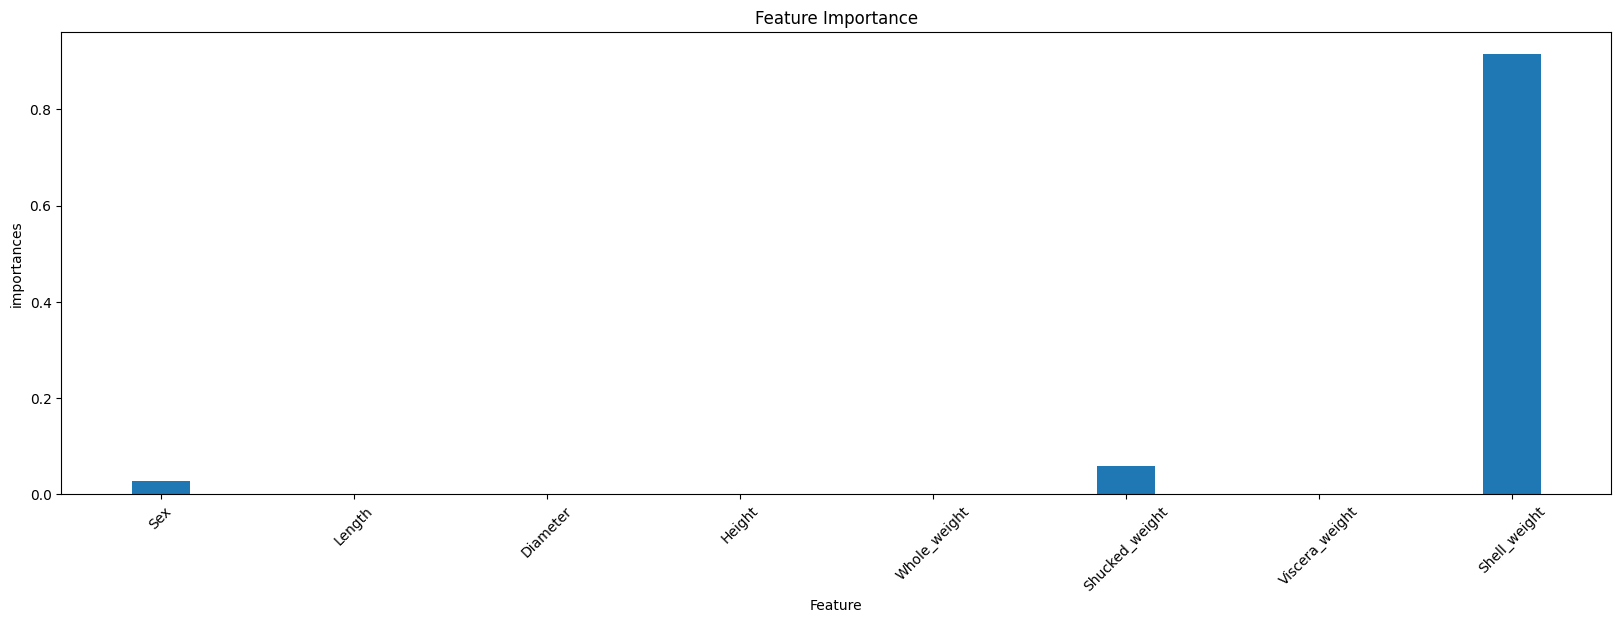

In [ ]:
# Feature Importance

importances = clf.feature_importances_
# Best model의 Feature Importance를  시각화
plt.figure(figsize = (20,6))
# 막대 그래프 생성
plt.bar(range(len(importances)), importances, width=0.3)
plt.xlabel('Feature')
plt.ylabel('importances')
plt.title('Feature Importance')
plt.xticks(range(len(importances)), X.columns, rotation = 45)
plt.show()

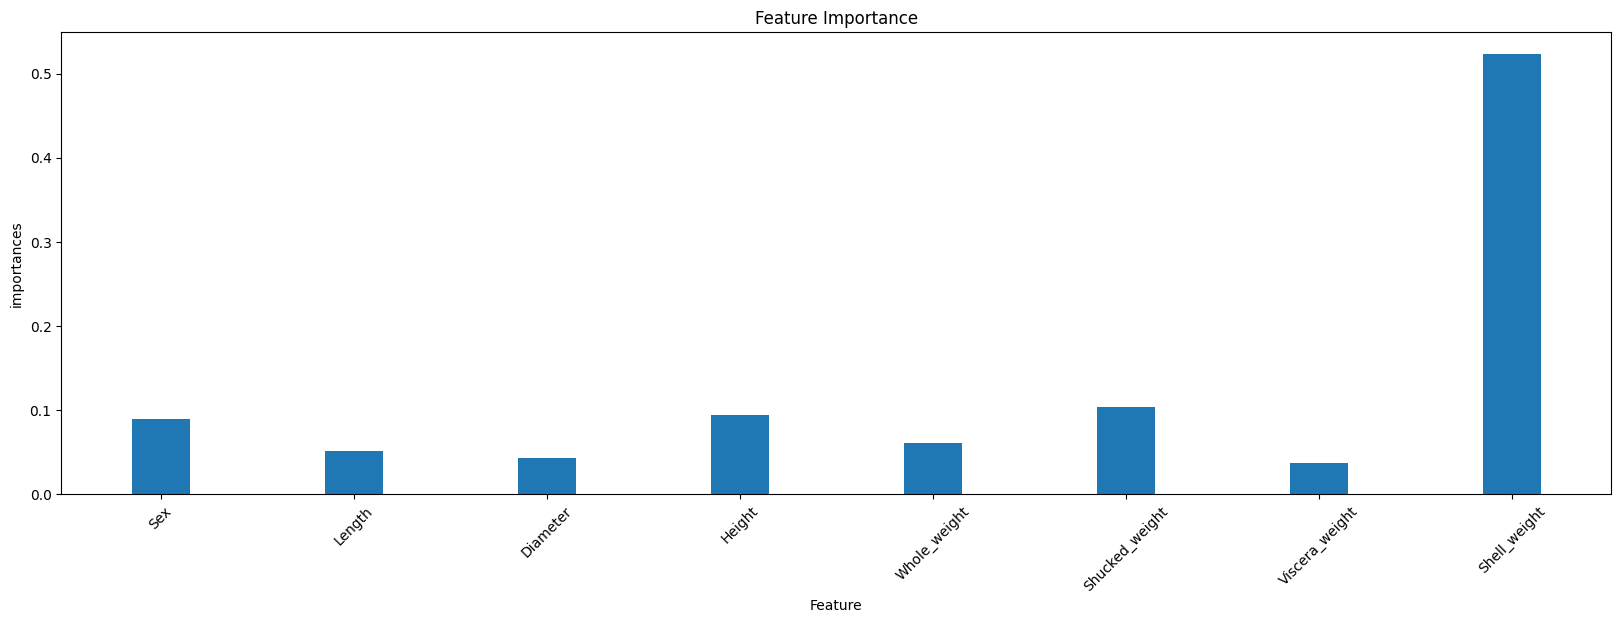

In [ ]:
# Feature Importance

importances = best_model.feature_importances_
# Best model의 Feature Importance를  시각화
plt.figure(figsize = (20,6))
# 막대 그래프 생성
plt.bar(range(len(importances)), importances, width=0.3)
plt.xlabel('Feature')
plt.ylabel('importances')
plt.title('Feature Importance')
plt.xticks(range(len(importances)), X.columns, rotation = 45)
plt.show()

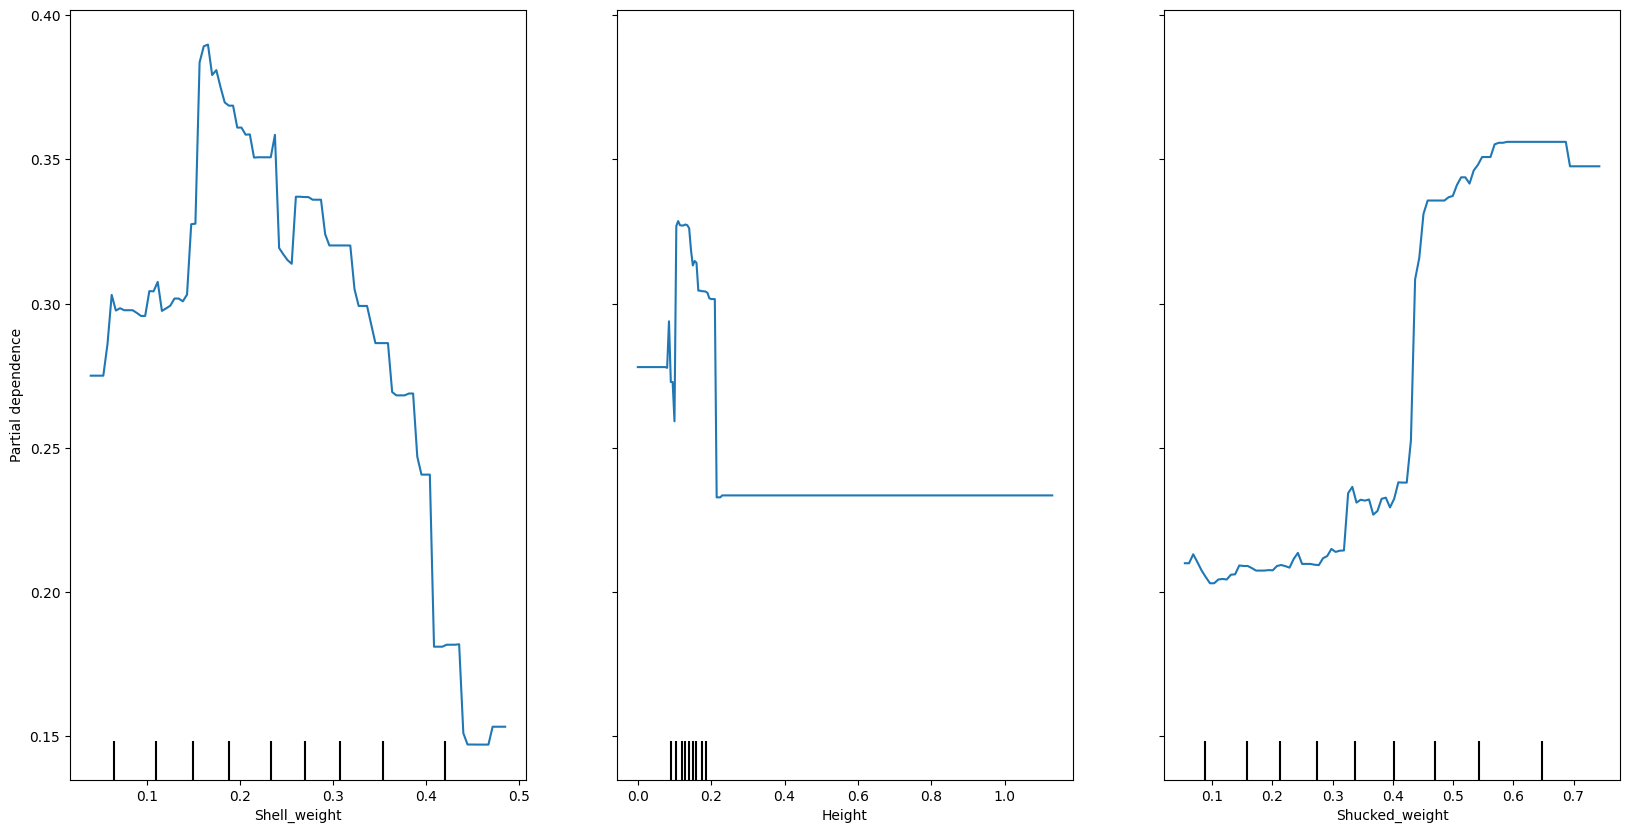

In [ ]:
#Partial Dependence Plot (PDP)

# 시각화할 특성을 선택
feature_names = ['Shell_weight', 'Height', 'Shucked_weight']
feature = feature_names
fig, ax = plt.subplots(figsize= (20,10))
display = PartialDependenceDisplay.from_estimator(best_model, X_train, feature, target=0, ax=ax)

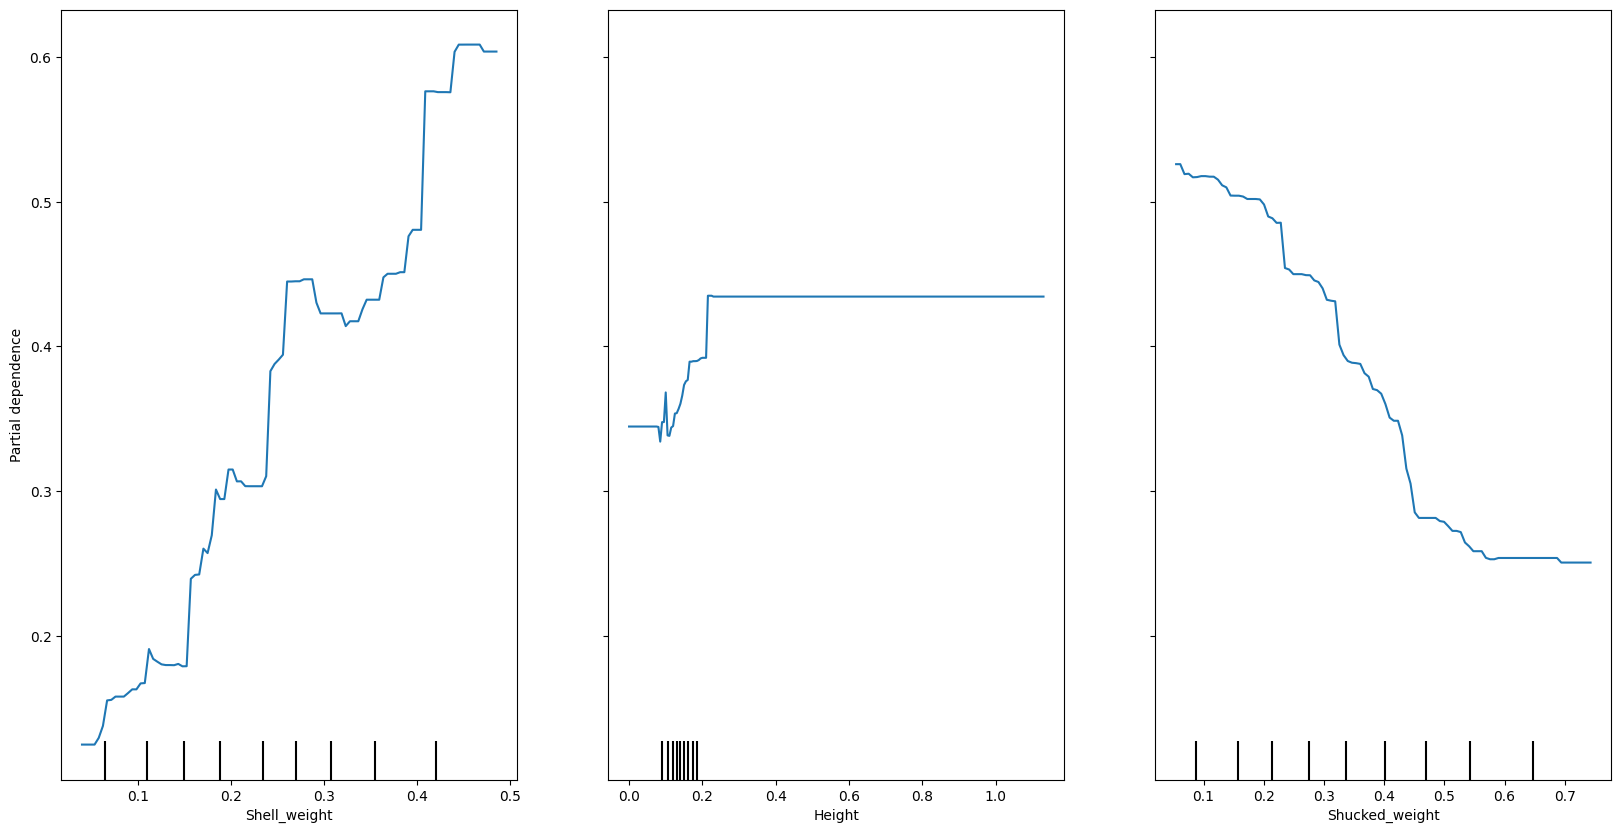

In [ ]:
#Partial Dependence Plot (PDP)

# 시각화할 특성을 선택
feature_names = ['Shell_weight', 'Height', 'Shucked_weight']
feature = feature_names
fig, ax = plt.subplots(figsize= (20,10))
display = PartialDependenceDisplay.from_estimator(best_model, X_train, feature, target=1, ax=ax)

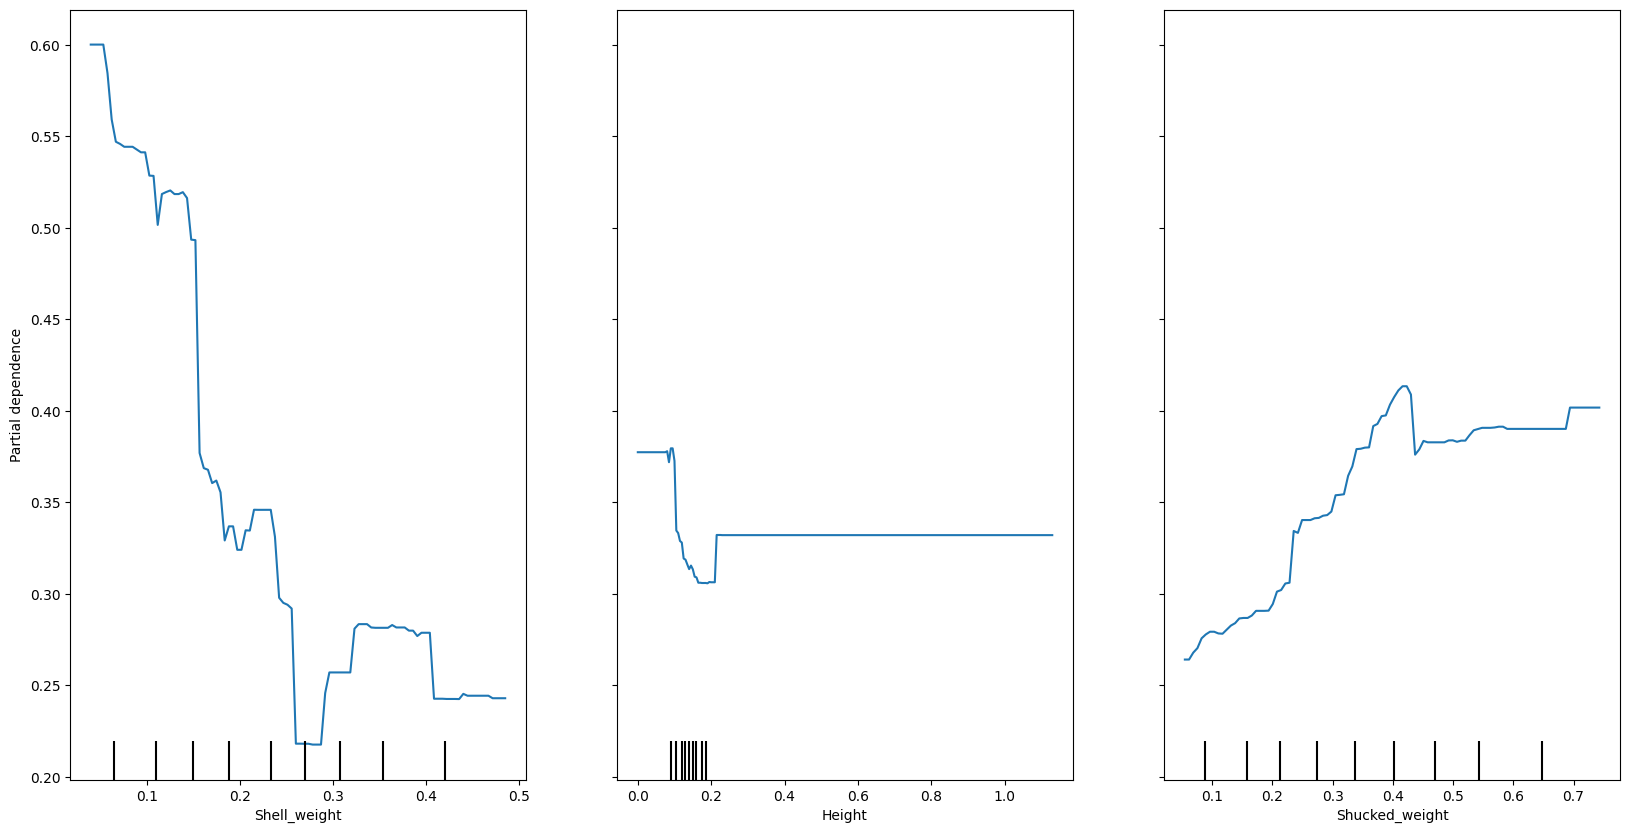

In [ ]:
#Partial Dependence Plot (PDP)

# 시각화할 특성을 선택
# feature = ['Shell_weight', 'Height', 'Shucked_weight']
feature = feature_names
fig, ax = plt.subplots(figsize= (20,10))
display = PartialDependenceDisplay.from_estimator(best_model, X_train, feature, target=2, ax=ax)

# 6교시 설명가능한 인공지능2: Shapley Value

In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
# SHAP Value 생성
explainer = shap.TreeExplainer(best_model)
# SHAP 값 계산
shap_values = explainer.shap_values(X_test)

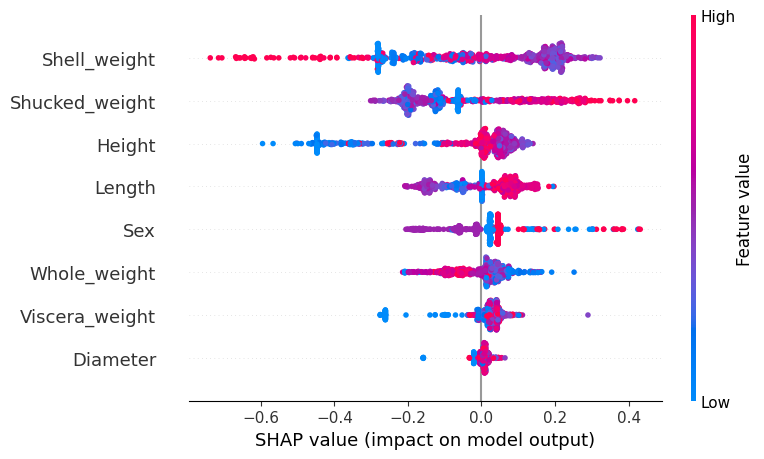

In [ ]:
shap.summary_plot(shap_values[:, :, 0], X_test)

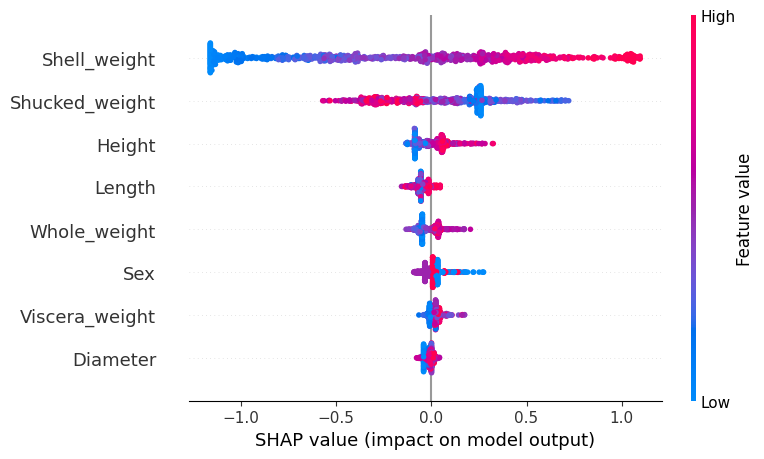

In [ ]:
shap.summary_plot(shap_values[:, :, 1], X_test)

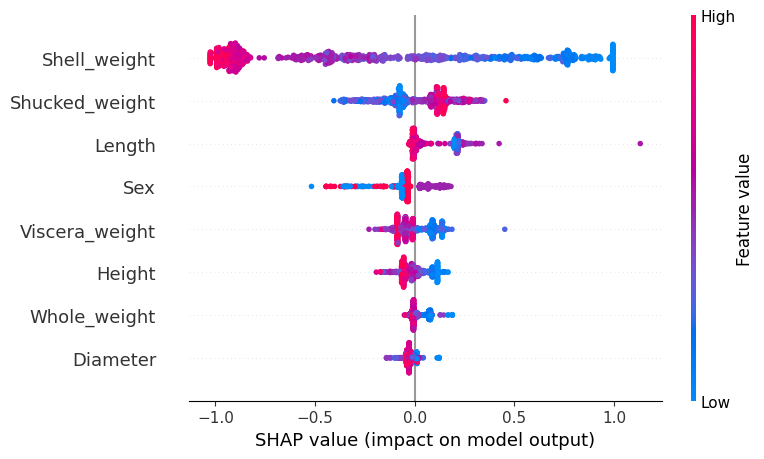

In [ ]:
shap.summary_plot(shap_values[:, :, 2], X_test)

니다. 성실히 수행해 주시기 바랍니다.
